In [1]:
# import dependencies
import pyreadr
import rdata
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


Read-in csv and assess for preprocessing

In [38]:
#Read-in csv


houston_metro = pd.read_csv("/Users/geoffmaitland/Documents/aibootcamp/Git- Local-Repositories/Project-2/daily-temps-2000-2020/houston_metro_daily_temps_2000_2020_v2.csv")
houston_metro

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,UTCImin_C,UTCImax_C,UTCImean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,48015,10958.0,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,10.21,24.58,16.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48039,10958.0,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,11.05,24.13,16.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48071,10958.0,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,10.36,24.46,15.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48157,10958.0,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,10.95,24.47,16.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48167,10958.0,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,9.52,23.62,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69016,48167,18626.0,18.44,22.81,19.76,15.86,19.08,17.85,9.95,15.43,...,9.89,23.85,15.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69017,48201,18626.0,17.35,23.85,19.56,15.08,19.14,17.59,10.02,17.06,...,11.55,25.48,17.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69018,48291,18626.0,17.22,22.77,19.02,14.96,19.07,17.46,10.32,16.52,...,12.76,25.13,17.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69019,48339,18626.0,15.27,23.22,18.80,13.98,18.90,17.09,8.33,17.08,...,12.03,25.59,17.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
houston_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69021 entries, 0 to 69020
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StCoFIPS    69021 non-null  int64  
 1   Date        69021 non-null  float64
 2   Tmin_C      69021 non-null  float64
 3   Tmax_C      69021 non-null  float64
 4   Tmean_C     69021 non-null  float64
 5   TDmin_C     69021 non-null  float64
 6   TDmax_C     69021 non-null  float64
 7   TDmean_C    69021 non-null  float64
 8   NETmin_C    69021 non-null  float64
 9   NETmax_C    69021 non-null  float64
 10  NETmean_C   69021 non-null  float64
 11  HImin_C     69021 non-null  float64
 12  HImax_C     69021 non-null  float64
 13  HImean_C    69021 non-null  float64
 14  HXmin_C     69021 non-null  float64
 15  HXmax_C     69021 non-null  float64
 16  HXmean_C    69021 non-null  float64
 17  WBGTmin_C   69021 non-null  float64
 18  WBGTmax_C   69021 non-null  float64
 19  WBGTmean_C  69021 non-nul

Preprocessing needed: 
- Convert date and set as index (2-steps needed)
- Drop nulls
- Drop FIPS info (only looking at 1 county)
- Rename/Reorder columns
- Celsius to Fahrenheit conversion 

In [40]:
# Function to convert days in 'posixct_date' (assumed to be days since 1970-01-01) to 'YYYYMMDD'

def posixct_date_to_yyyymmdd(posixct_date):
    epoch_start = datetime.datetime(1970, 1, 1)
    actual_date = epoch_start + datetime.timedelta(seconds=int(posixct_date * 86400))  # Convert days to seconds
    return actual_date.strftime('%Y%m%d')

houston_metro['Date'] = houston_metro['Date'].apply(posixct_date_to_yyyymmdd)

houston_metro.head()

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,UTCImin_C,UTCImax_C,UTCImean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,48015,20000102,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,10.21,24.58,16.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48039,20000102,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,11.05,24.13,16.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48071,20000102,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,10.36,24.46,15.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48157,20000102,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,10.95,24.47,16.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48167,20000102,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,9.52,23.62,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
houston_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69021 entries, 0 to 69020
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StCoFIPS    69021 non-null  int64  
 1   Date        69021 non-null  object 
 2   Tmin_C      69021 non-null  float64
 3   Tmax_C      69021 non-null  float64
 4   Tmean_C     69021 non-null  float64
 5   TDmin_C     69021 non-null  float64
 6   TDmax_C     69021 non-null  float64
 7   TDmean_C    69021 non-null  float64
 8   NETmin_C    69021 non-null  float64
 9   NETmax_C    69021 non-null  float64
 10  NETmean_C   69021 non-null  float64
 11  HImin_C     69021 non-null  float64
 12  HImax_C     69021 non-null  float64
 13  HImean_C    69021 non-null  float64
 14  HXmin_C     69021 non-null  float64
 15  HXmax_C     69021 non-null  float64
 16  HXmean_C    69021 non-null  float64
 17  WBGTmin_C   69021 non-null  float64
 18  WBGTmax_C   69021 non-null  float64
 19  WBGTmean_C  69021 non-nul

In [42]:
# Convert "Date" to datetime format
houston_metro['Date'] = pd.to_datetime(houston_metro['Date'].astype(str), format='%Y%m%d')

houston_metro

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,UTCImin_C,UTCImax_C,UTCImean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,48015,2000-01-02,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,10.21,24.58,16.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48039,2000-01-02,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,11.05,24.13,16.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48071,2000-01-02,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,10.36,24.46,15.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48157,2000-01-02,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,10.95,24.47,16.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48167,2000-01-02,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,9.52,23.62,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69016,48167,2020-12-30,18.44,22.81,19.76,15.86,19.08,17.85,9.95,15.43,...,9.89,23.85,15.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69017,48201,2020-12-30,17.35,23.85,19.56,15.08,19.14,17.59,10.02,17.06,...,11.55,25.48,17.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69018,48291,2020-12-30,17.22,22.77,19.02,14.96,19.07,17.46,10.32,16.52,...,12.76,25.13,17.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69019,48339,2020-12-30,15.27,23.22,18.80,13.98,18.90,17.09,8.33,17.08,...,12.03,25.59,17.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
houston_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69021 entries, 0 to 69020
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   StCoFIPS    69021 non-null  int64         
 1   Date        69021 non-null  datetime64[ns]
 2   Tmin_C      69021 non-null  float64       
 3   Tmax_C      69021 non-null  float64       
 4   Tmean_C     69021 non-null  float64       
 5   TDmin_C     69021 non-null  float64       
 6   TDmax_C     69021 non-null  float64       
 7   TDmean_C    69021 non-null  float64       
 8   NETmin_C    69021 non-null  float64       
 9   NETmax_C    69021 non-null  float64       
 10  NETmean_C   69021 non-null  float64       
 11  HImin_C     69021 non-null  float64       
 12  HImax_C     69021 non-null  float64       
 13  HImean_C    69021 non-null  float64       
 14  HXmin_C     69021 non-null  float64       
 15  HXmax_C     69021 non-null  float64       
 16  HXmean_C    69021 non-

In [44]:
houston_metro = houston_metro.rename(columns={
                                                'Tmin_C':'Min Ambient Temp',
                                                'Tmax_C':'Max Ambient Temp',
                                                'Tmean_C':'Mean Ambient Temp',
                                                'TDmin_C':'Min Dew Point',
                                                'TDmax_C':'Max Dew point',
                                                'TDmean_C':'Mean Dew Point',
                                                'NETmin_C':'Min Net Effective Temp',
                                                'NETmax_C':'Max Net Effective Temp',
                                                'NETmean_C':'Mean Net Effective Temp',
                                                'HImin_C':'Min Heat Index',             
                                                'HImax_C':'Max Heat Index',             
                                                'HImean_C':'Mean Heat Index',           
                                                'HXmin_C':'Min Humidex',             
                                                'HXmax_C':'Max Humidex',             
                                                'HXmean_C':'Mean Humidex',           
                                                'WBGTmin_C':'Min WBGT',           
                                                'WBGTmax_C':'Max WBGT',          
                                                'WBGTmean_C':'Mean WBGT',           
                                                'UTCImin_C':'Min UTCI',       
                                                'UTCImax_C':'Max UTCI',          
                                                'UTCImean_C':'Mean UTCI',})
houston_metro

,StCoFIPS,Date,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,...,Min UTCI,Max UTCI,Mean UTCI,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,48015,2000-01-02,18.67,25.29,21.26,16.37,18.84,17.91,10.10,17.70,...,10.21,24.58,16.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48039,2000-01-02,19.16,24.30,21.17,17.82,19.36,18.67,10.98,16.80,...,11.05,24.13,16.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48071,2000-01-02,18.42,23.47,20.24,17.40,19.16,18.40,10.07,16.16,...,10.36,24.46,15.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48157,2000-01-02,18.85,25.20,21.38,17.16,19.22,18.34,10.65,17.62,...,10.95,24.47,16.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48167,2000-01-02,18.74,23.23,20.46,17.57,19.18,18.52,9.99,15.60,...,9.52,23.62,15.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69016,48167,2020-12-30,18.44,22.81,19.76,15.86,19.08,17.85,9.95,15.43,...,9.89,23.85,15.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69017,48201,2020-12-30,17.35,23.85,19.56,15.08,19.14,17.59,10.02,17.06,...,11.55,25.48,17.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69018,48291,2020-12-30,17.22,22.77,19.02,14.96,19.07,17.46,10.32,16.52,...,12.76,25.13,17.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69019,48339,2020-12-30,15.27,23.22,18.80,13.98,18.90,17.09,8.33,17.08,...,12.03,25.59,17.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:

# Drop columns

houston_metro = houston_metro.drop(columns={'Min Dew Point', 'Max Dew point','Mean Dew Point','Min Net Effective Temp','Max Net Effective Temp','Mean Net Effective Temp','Min Humidex','Max Humidex','Mean Humidex','Min UTCI','Max UTCI','Mean UTCI','Flag_T','Flag_TD','Flag_NET','Flag_HI','Flag_HX','Flag_WBGT','Flag_UTCI','Flag_UTCI'}, axis=1)

#set "Date" as index

houston_metro.set_index("Date", inplace=True)

houston_metro.head()



KeyError: "['Max Net Effective Temp', 'Mean Dew Point', 'Min Net Effective Temp', 'Flag_HX', 'Max UTCI', 'Flag_TD', 'Min UTCI', 'Mean Humidex', 'Max Humidex', 'Max Dew point', 'Flag_UTCI', 'Flag_WBGT', 'Mean UTCI', 'Flag_HI', 'Flag_T', 'Min Dew Point', 'Min Humidex', 'Flag_NET', 'Mean Net Effective Temp'] not found in axis"

In [50]:
#Convert Data from Celsius to Fahrenheit

# Define conversion functions
def celsius_to_fahrenheit(celsius):
    return celsius * 9/5 + 32

# Apply conversion
houston_metro= houston_metro.map(celsius_to_fahrenheit)
houston_metro

,StCoFIPS,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT
Date,,,,,,,,,,
2000-01-02,86459.0,65.606,77.522,70.268,66.254,77.774,70.862,64.346,73.166,67.928
2000-01-02,86502.2,66.488,75.740,70.106,67.190,76.262,70.862,65.138,73.634,68.774
2000-01-02,86559.8,65.156,74.246,68.432,65.804,74.930,69.188,63.986,74.138,67.748
2000-01-02,86714.6,65.930,77.360,70.484,66.578,77.684,71.168,64.616,73.418,68.504
2000-01-02,86732.6,65.732,73.814,68.828,66.362,74.444,69.602,64.436,73.382,68.036
...,...,...,...,...,...,...,...,...,...,...
2020-12-30,86732.6,65.192,73.058,67.568,65.840,73.796,68.198,63.338,73.904,66.812
2020-12-30,86793.8,63.230,74.930,67.208,63.842,75.524,67.784,61.916,74.678,66.254
2020-12-30,86955.8,62.996,72.986,66.236,63.392,73.634,66.830,61.016,73.256,65.552


In [52]:
houston_metro = houston_metro.drop(columns={'StCoFIPS'}, axis=1)
houston_metro

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT
Date,,,,,,,,,
2000-01-02,65.606,77.522,70.268,66.254,77.774,70.862,64.346,73.166,67.928
2000-01-02,66.488,75.740,70.106,67.190,76.262,70.862,65.138,73.634,68.774
2000-01-02,65.156,74.246,68.432,65.804,74.930,69.188,63.986,74.138,67.748
2000-01-02,65.930,77.360,70.484,66.578,77.684,71.168,64.616,73.418,68.504
2000-01-02,65.732,73.814,68.828,66.362,74.444,69.602,64.436,73.382,68.036
...,...,...,...,...,...,...,...,...,...
2020-12-30,65.192,73.058,67.568,65.840,73.796,68.198,63.338,73.904,66.812
2020-12-30,63.230,74.930,67.208,63.842,75.524,67.784,61.916,74.678,66.254
2020-12-30,62.996,72.986,66.236,63.392,73.634,66.830,61.016,73.256,65.552


In [53]:
# Exporting a "clean" csv
houston_metro.to_csv('houston-metro-cleaned.csv', index=True)

WBGT safe limit for Zone 3 is 86.1- how many times has it been exceeded overall?

In [14]:
# Count over 20 years

wbgt_threshold = 86.1

# Count values above threshold in 'max wbgt'
count_above_wbgt_threshold = (harris_co['Max WBGT'] > wbgt_threshold).sum()

# Output the result
print(f"Number of entries above {wbgt_threshold}: {count_above_wbgt_threshold}")

Number of entries above 86.1: 1887


In [15]:

# Count by year

harris_co_renamed.index = pd.to_datetime(harris_co_renamed.index)

wbgt_threshold = 86.1

# Group by year in the index and count values above threshold in 'Max WBGT'
count_above_wbgt_threshold_by_year = harris_co_renamed.groupby(harris_co_renamed.index.year).apply(
    lambda x: (x['Max WBGT'] > wbgt_threshold).sum()
)

wbgt_days_exceeded = pd.DataFrame(count_above_wbgt_threshold_by_year)
wbgt_days_exceeded

,0
Date,
2000,88
2001,78
2002,69
2003,88
2004,78
2005,101
2006,80
2007,90
2008,81


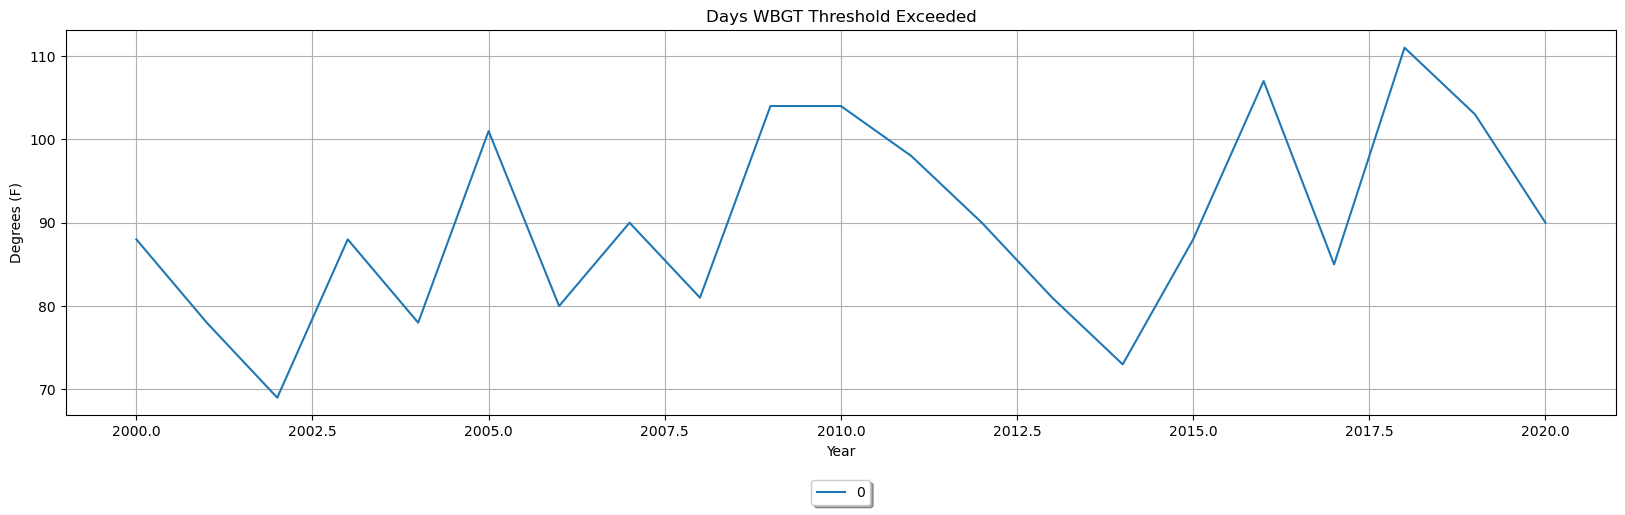

In [16]:
wbgt_days_exceeded.plot(figsize=(20,5))

# Display the plot
plt.title('Days WBGT Threshold Exceeded')
plt.xlabel('Year')
plt.ylabel('Degrees (F)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

Heat Index Danger Threshold is 105. How many times has it been exceeded?

In [17]:
# Count over 20 years

hi_threshold = 105

# Count values above threshold in 'max wbgt'
count_above_hi_threshold = (harris_co_renamed['Max Heat Index'] > hi_threshold).sum()

# Output the result
print(f"Number of entries above {hi_threshold}: {count_above_hi_threshold}")

Number of entries above 105: 101


In [18]:
# Count by year

harris_co_renamed.index = pd.to_datetime(harris_co_renamed.index)

hi_threshold = 105

# Group by year in the index and count values above threshold in 'Max WBGT'
count_above_hi_threshold_by_year = harris_co_renamed.groupby(harris_co_renamed.index.year).apply(
    lambda x: (x['Max Heat Index'] > hi_threshold).sum()
)

hi_days_exceeded = pd.DataFrame(count_above_hi_threshold_by_year)


In [19]:
hi_renamed=hi_days_exceeded.rename(columns={"0":"Heat Index Exceeded"})
hi_renamed

,0
Date,
2000,6
2001,0
2002,1
2003,2
2004,1
2005,5
2006,1
2007,2
2008,2


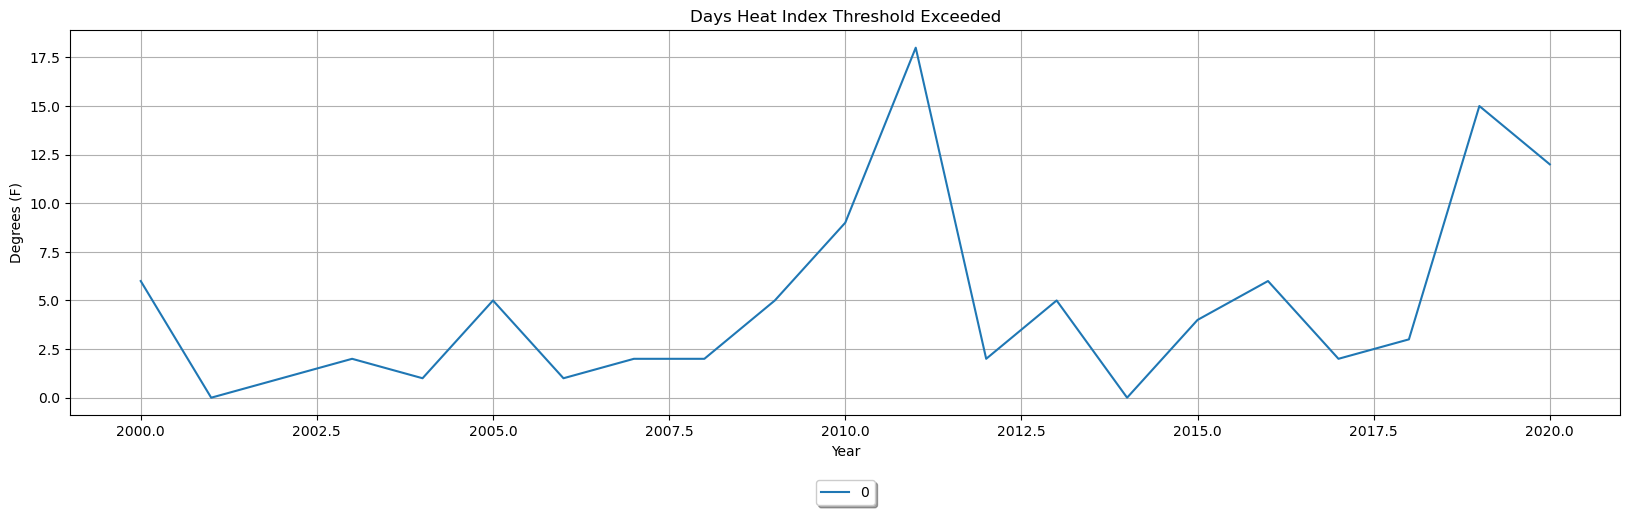

In [20]:
hi_days_exceeded.plot(figsize=(20,5))

# Display the plot
plt.title('Days Heat Index Threshold Exceeded')
plt.xlabel('Year')
plt.ylabel('Degrees (F)')
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

In [21]:
exceeded_merged_df = pd.merge(wbgt_days_exceeded,hi_days_exceeded, on='Date')
df_merged = exceeded_merged_df.rename(columns={'0_x':'WBGT', '0_y':'HI'})
df_merged

,WBGT,HI
Date,,
2000,88,6
2001,78,0
2002,69,1
2003,88,2
2004,78,1
2005,101,5
2006,80,1
2007,90,2
2008,81,2


Comparison plot - WBGT and HI

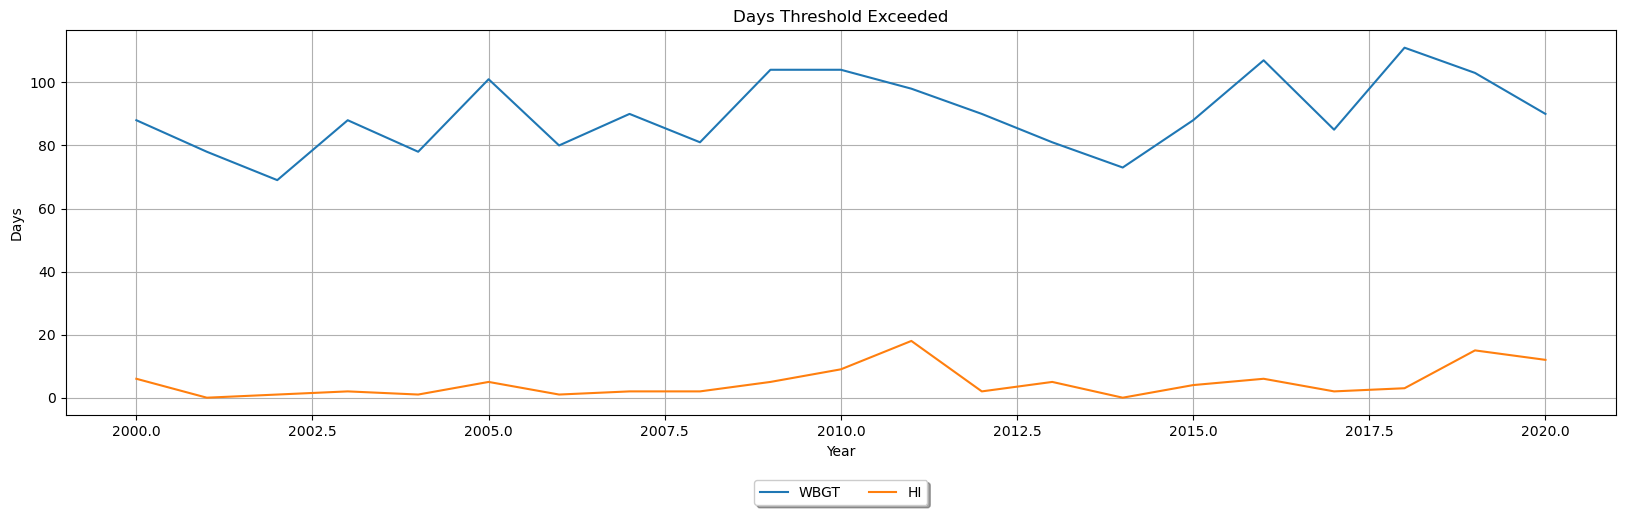

In [22]:
df_merged.plot(figsize=(20,5))

# Display the plot
plt.title('Days Threshold Exceeded')
plt.xlabel('Year')
plt.ylabel('Days')
plt.grid()

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

Check how weekly, monthly and yearly means visualize the data

In [23]:

# Resample the data to weekly mean

harris_co_weekly_mean = harris_co_renamed.resample('W').mean()
harris_co_weekly_mean.head(40)

,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,65.282000,76.838000,69.872000,62.870000,66.560000,64.940000,50.630000,63.464000,56.372000,65.912000,...,70.556000,75.200000,86.882000,80.870000,64.076000,73.850000,68.180000,51.836000,76.532000,62.438000
2000-01-09,48.097143,63.440857,56.086571,35.479143,52.550857,45.440857,32.488571,49.498571,41.750857,46.582571,...,54.955143,46.618571,66.572857,57.688571,43.995714,61.424857,53.319714,31.791714,65.135429,48.053429
2000-01-16,54.793143,72.338000,62.774857,39.066286,57.518857,50.966857,40.737714,59.707143,49.930571,53.188571,...,62.006000,54.710857,76.933143,66.794000,49.524286,69.609714,59.666000,40.310857,77.681429,57.346571
2000-01-23,56.379714,72.307143,63.502571,47.161143,60.512000,53.036857,42.473429,59.414000,50.648000,55.286857,...,62.916286,58.791714,78.098000,68.097714,52.779714,69.108286,60.607143,43.247429,76.539714,58.210571
2000-01-30,39.372286,54.338000,46.315143,27.404857,38.757714,32.519429,20.865714,40.377714,30.099714,37.937429,...,44.147429,35.456000,51.990286,42.746000,35.998571,53.916286,43.288571,21.508571,60.051714,36.592571
2000-02-06,42.038857,59.576000,50.187714,32.342000,43.142000,37.585143,25.455714,47.225429,35.857143,40.326286,...,48.117714,38.791143,57.662857,48.017429,38.549429,58.359714,47.292286,28.027143,65.773143,43.869714
2000-02-13,55.443714,72.680000,62.803143,51.699714,60.452857,56.652286,42.049143,61.383714,50.732857,55.127429,...,62.651429,59.730286,78.820571,68.851143,53.795429,71.029143,61.355429,46.328000,79.016000,59.771429
2000-02-20,58.645143,74.672857,65.562286,51.499143,60.571143,55.693143,45.458857,63.461429,53.690000,58.107714,...,65.287143,63.232571,80.908571,71.728571,55.811429,73.042571,63.268571,49.097429,81.564286,62.751714
2000-02-27,57.279714,74.516000,65.302571,48.536857,60.288286,54.836857,43.607429,61.072571,51.926000,56.508286,...,64.911714,60.856571,80.535714,70.790000,54.232571,71.186000,62.309429,44.605143,76.336571,58.768571


Exploratory Visualizations to identify any patterns to drill into

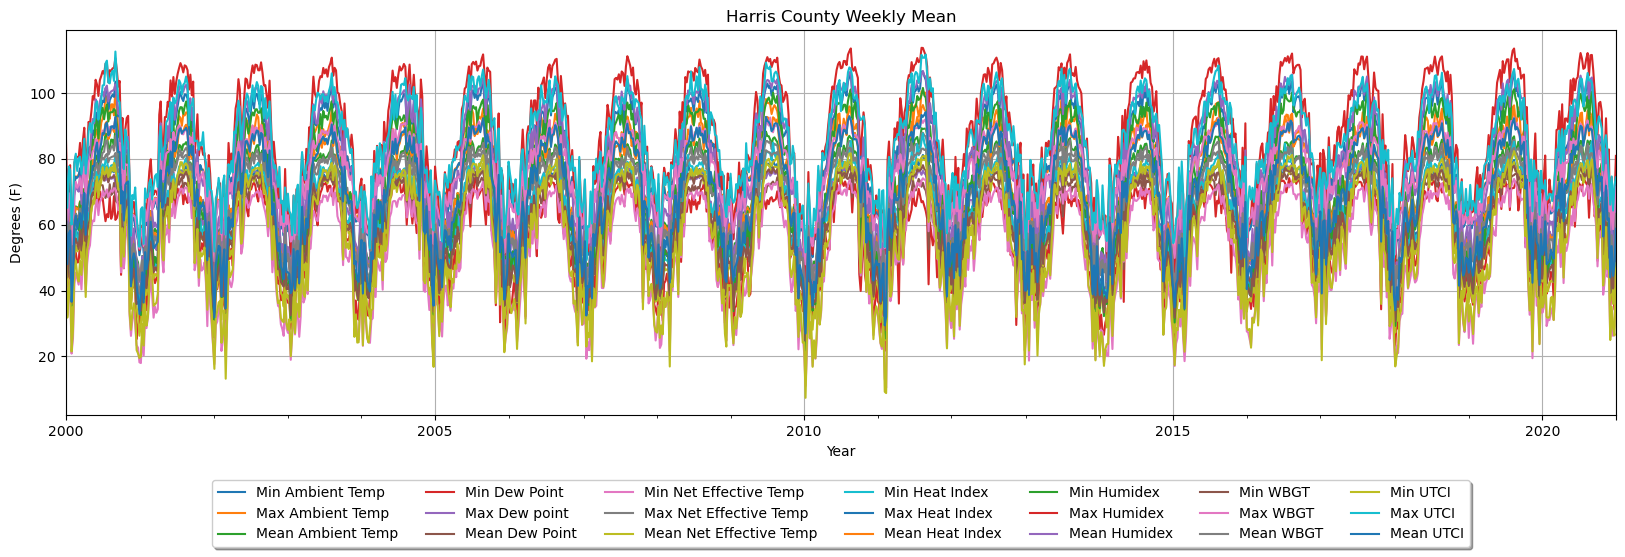

In [24]:
#Sample Visualization - Weekly Mean


harris_co_weekly_mean.plot(figsize=(20,5))

# Display the plot
plt.title('Harris County Weekly Mean')
plt.xlabel('Year')  # Set x-axis label, since the index name is not usually displayed
plt.ylabel('Degrees (F)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

In [25]:

# Resample the data to monthly mean
harris_co_monthly_mean = harris_co_renamed.resample('M').mean()
harris_co_monthly_mean.head(12)

/var/folders/xd/jl_0pvqx5295gyzxfw09l8b00000gn/T/ipykernel_65084/1287626706.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  harris_co_monthly_mean = harris_co_renamed.resample('M').mean()


,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,49.919600,65.619800,57.272600,37.856000,52.324400,45.717200,34.440200,52.243400,43.217600,48.518600,...,56.116400,49.385600,68.469200,59.069000,45.912200,63.549200,54.338000,34.651400,69.774800,50.168600
2000-02-29,53.799241,71.230690,61.657172,46.863655,57.044207,52.081172,39.567448,59.114207,48.757379,53.048207,...,61.029034,56.363310,75.683517,65.880966,51.143310,69.105448,59.276828,42.308414,76.260138,56.930621
2000-03-31,58.702129,75.068774,66.215097,53.428710,63.223613,57.970516,45.638774,63.710194,54.315355,58.398452,...,66.230194,64.156129,82.820387,73.407548,56.566516,73.485935,64.374452,48.526903,80.419419,63.475613
2000-04-30,60.519200,77.871800,68.893400,53.556800,63.514400,58.409600,48.766400,66.639200,57.556400,60.270800,...,68.960000,66.126800,86.003600,76.259600,57.766400,75.772400,66.425600,51.317000,83.858000,67.131200
2000-05-31,71.845613,84.832903,77.602710,67.334581,72.502323,70.034000,62.449613,74.817935,68.193355,73.130000,...,80.160452,86.826258,99.295032,92.824903,70.476452,83.172258,75.957161,68.103355,92.456774,79.060129
2000-06-30,74.507600,88.529600,80.762600,67.778600,73.803800,71.150600,66.734000,78.160400,71.820200,76.034600,...,84.047000,91.483400,103.139600,96.921800,72.969200,85.358600,78.215600,73.086800,96.390200,83.390000
2000-07-31,76.265484,95.670065,85.446645,63.484323,73.791935,69.277419,69.481806,83.366774,75.969355,78.102065,...,88.713935,93.861355,106.820194,100.082968,74.212903,88.745290,80.320710,75.922903,105.570065,88.866065
2000-08-31,76.144710,95.560323,85.044258,64.778581,74.367355,70.493871,70.264516,83.491613,76.392065,77.964452,...,88.767355,94.381613,107.478645,100.739097,74.453871,89.873484,80.729484,77.354194,105.729161,89.601161
2000-09-30,71.507600,90.494000,80.097800,59.913800,68.420000,63.968600,62.250800,78.699800,69.999200,72.633200,...,82.297400,83.359400,101.196800,91.623800,67.826000,84.002600,74.761400,67.263800,99.239600,81.195200


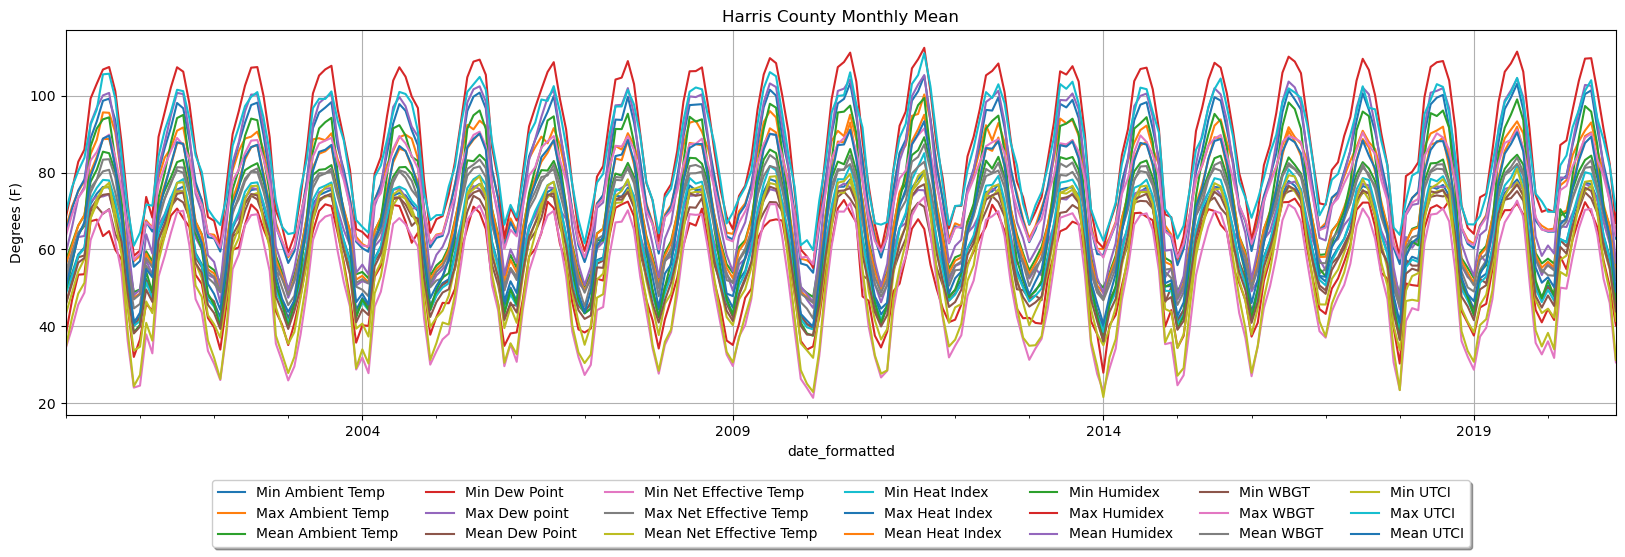

In [26]:
#Sample Visualization - Monthly Mean

harris_co_monthly_mean.plot(figsize=(20,5))

# Display the plot
plt.title('Harris County Monthly Mean')
plt.xlabel('date_formatted')  # Set x-axis label, since the index name is not usually displayed
plt.ylabel('Degrees (F)')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

In [27]:

# Resample the data to yearly mean

harris_co_yearly_mean = harris_co_renamed.resample('Y').mean()
harris_co_yearly_mean.head(21)

/var/folders/xd/jl_0pvqx5295gyzxfw09l8b00000gn/T/ipykernel_65084/1005087828.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  harris_co_yearly_mean = harris_co_renamed.resample('Y').mean()


,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Dew Point,Max Dew point,Mean Dew Point,Min Net Effective Temp,Max Net Effective Temp,Mean Net Effective Temp,Min Heat Index,...,Mean Heat Index,Min Humidex,Max Humidex,Mean Humidex,Min WBGT,Max WBGT,Mean WBGT,Min UTCI,Max UTCI,Mean UTCI
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,62.615879,78.993512,70.160789,54.208252,64.014258,59.317441,51.247523,67.377496,58.880263,62.842482,...,71.151578,70.992784,87.513430,79.051112,60.098000,76.031847,67.209430,55.137742,85.572636,68.716055
2001-12-31,61.049534,76.711310,68.353836,55.789441,63.880071,59.884564,49.711803,65.936805,57.537759,61.254241,...,69.448729,69.160877,86.139956,77.555140,59.103808,75.597332,66.481293,54.418236,84.263271,67.702137
2002-12-31,61.262970,76.979682,68.523134,55.050208,63.708899,59.496307,49.713529,65.852773,57.414668,61.467677,...,69.629468,69.390685,86.303386,77.711321,59.081715,75.204142,66.342225,53.833655,83.686729,67.113562
2003-12-31,60.911995,76.738729,68.264033,55.265814,63.767189,59.632121,49.611003,66.034055,57.527649,61.059200,...,69.412778,68.811677,86.321090,77.496849,58.744844,75.706219,66.367178,53.848548,84.451507,67.526822
2004-12-31,62.020311,76.946000,68.945934,56.480443,64.510311,60.529115,50.791852,66.174475,58.211787,62.283623,...,70.176967,70.433049,86.840000,78.566590,59.892328,75.811213,67.009557,55.368279,84.057869,68.160721
2005-12-31,62.057090,78.740970,69.866625,54.052663,63.206773,58.762203,51.044937,67.362701,58.985797,62.149014,...,71.057288,70.053726,87.036997,78.560230,59.479047,76.121304,66.975627,55.173397,86.146318,69.053468
2006-12-31,62.326597,78.835162,70.031584,54.495266,64.550460,59.538274,51.263452,67.752833,59.214915,62.413342,...,71.090477,70.339162,88.150038,79.196542,59.740515,76.551529,67.390219,55.037732,85.835633,68.901332
2007-12-31,61.554027,76.714762,68.559233,56.101507,64.529501,60.359715,50.548088,66.257353,58.078844,61.832904,...,69.860756,69.976795,86.874553,78.331655,59.503951,75.974493,66.846964,55.148937,84.358104,68.205101
2008-12-31,61.609508,78.695295,69.651672,52.991836,63.645672,58.580639,50.030738,67.216213,58.413131,61.640639,...,70.606164,69.103705,87.107541,78.229361,58.860721,75.830148,66.716590,53.375836,85.205836,67.849115


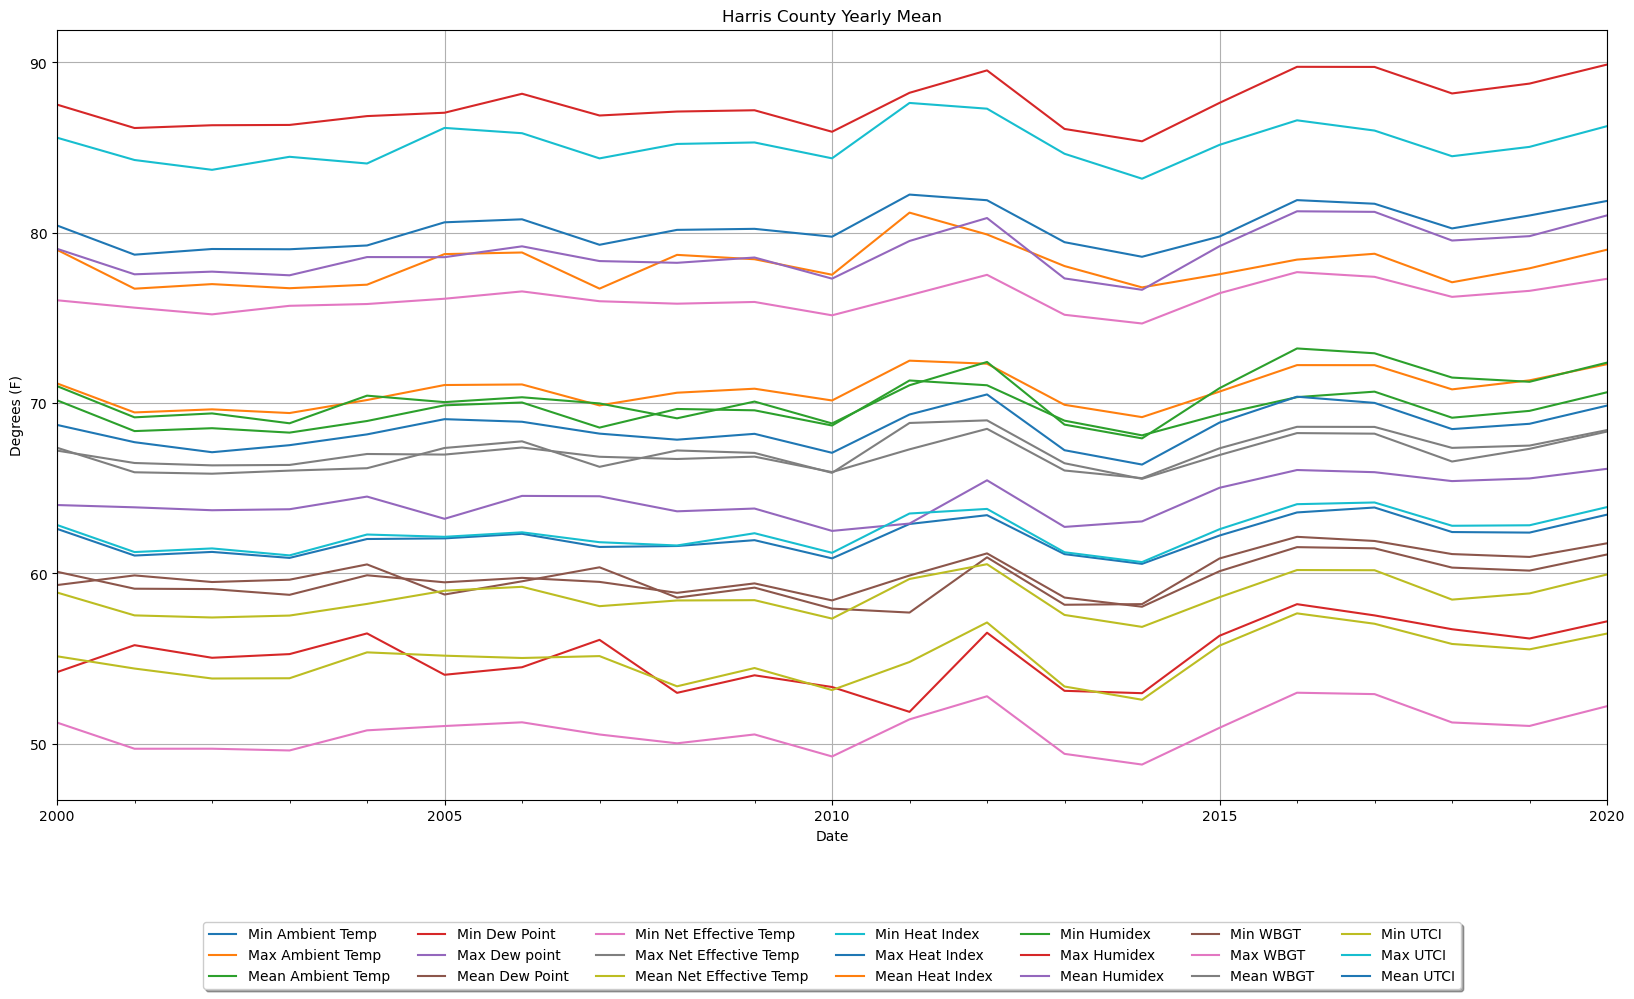

In [28]:
#Sample Visualization - Yearly Mean


harris_co_yearly_mean.plot(figsize=(20,10))

# Display the plot
plt.title('Harris County Yearly Mean')
plt.grid()
plt.ylabel('Degrees (F)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=7)
plt.show()

Explore Diurnal Temperature Ranges (DTR) over time 

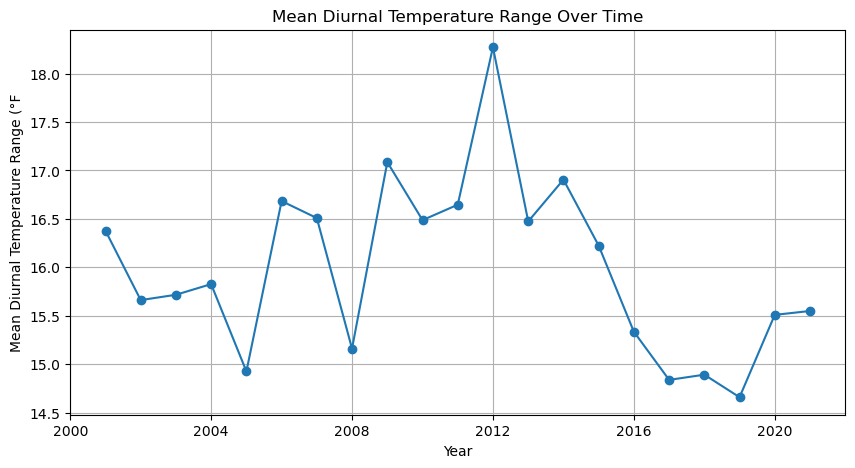

In [29]:


harris_co_yearly_mean['DTR'] = harris_co_yearly_mean['Max Ambient Temp'] - harris_co_yearly_mean['Min Ambient Temp']  # Calculate Daily Temperature Range
annual_dtr = harris_co_yearly_mean.groupby('Date')['DTR'].mean()  # Average DTR per year

# Plotting the trend
plt.figure(figsize=(10, 5))
plt.plot(annual_dtr.index, annual_dtr.values, marker='o')
plt.title("Mean Diurnal Temperature Range Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Diurnal Temperature Range (°F")
plt.grid(True)
plt.show()
